In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cartopy.crs as ccrs
import xarray as xr

In [2]:
#load datasets
ds = xr.open_dataset('/net/kryo/work2/fana/hindcast_bec/analysis/avg_zeta_1979-2016_hindcast.nc')
print('Data Loaded')
grid = xr.open_dataset('/net/nardus/work/Ana/masks_and_maps/humpac_grids/humpac15_sm5rf015_grd.nc')
print('Grid Loaded')

Data Loaded
Grid Loaded


/home/koehne/.conda/envs/eikes_miniconda/lib/python3.6/site-packages/xarray/coding/variables.py:69: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason:day is out of range for month
  return self.func(self.array)


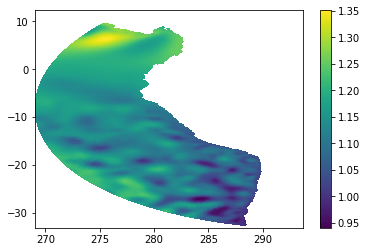

In [3]:
#plot some data
fig,ax = plt.subplots()
c0 = ax.pcolor(grid.lon_rho[:200,:],grid.lat_rho[:200,:],ds.zeta[0,:200,:])
plt.colorbar(c0)
plt.show()

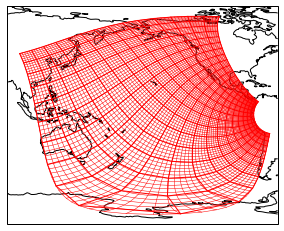

In [4]:
# Plot HUMPAC15 Grid
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.coastlines()
spac = 10
ax.plot(grid.lon_rho[::spac,::spac]-360.,grid.lat_rho[::spac,::spac],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[::spac,::spac].transpose())-360.,grid.lat_rho[::spac,::spac].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
spac2 = 50
ax.plot(grid.lon_rho[::spac2,::spac2]-360.,grid.lat_rho[::spac2,::spac2],'-r',linewidth=1,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[::spac2,::spac2].transpose())-360.,grid.lat_rho[::spac2,::spac2].transpose(),'-r',linewidth=1,transform=ccrs.PlateCarree())

plt.show()

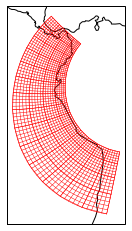

In [5]:
# Plot HUMPAC15 Grid Zoomed to Peru
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
max1 = 210
spac = 10
ax.plot(grid.lon_rho[:max1:spac,::spac]-360.,grid.lat_rho[:max1:spac,::spac],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac,::spac].transpose())-360.,grid.lat_rho[:max1:spac,::spac].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
spac2 = 50
ax.plot(grid.lon_rho[:max1:spac2,::spac2]-360.,grid.lat_rho[:max1:spac2,::spac2],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac2,::spac2].transpose())-360.,grid.lat_rho[:max1:spac2,::spac2].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
plt.show()

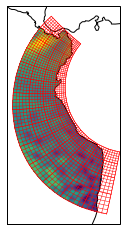

In [6]:
# Plot HUMPAC15 Grid Zoomed to Peru with data
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
c0 = ax.pcolor(grid.lon_rho[:200,:]-360.,grid.lat_rho[:200,:],ds.zeta[0,:200,:])
max1 = 210
spac = 10
ax.plot(grid.lon_rho[:max1:spac,::spac]-360.,grid.lat_rho[:max1:spac,::spac],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac,::spac].transpose())-360.,grid.lat_rho[:max1:spac,::spac].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
spac2 = 50
ax.plot(grid.lon_rho[:max1:spac2,::spac2]-360.,grid.lat_rho[:max1:spac2,::spac2],'-r',linewidth=0.5,transform=ccrs.PlateCarree())
ax.plot((grid.lon_rho[:max1:spac2,::spac2].transpose())-360.,grid.lat_rho[:max1:spac2,::spac2].transpose(),'-r',linewidth=0.5,transform=ccrs.PlateCarree())
plt.show()